### Student Information
Name:洪千惠

Student ID:109065536

GitHub ID:Carolhch

Kaggle name:Carol Hung

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

# 1. Take Home Exercises

## Load data

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

### Exercise 1

Plot word frequency for Top 30 words in both train and test dataset.

In [5]:
#import packages
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### plot train data

In [6]:
train_count_vect = CountVectorizer()
train_count = train_count_vect.fit_transform(train_df.text)

In [7]:
train_term_frequencies = {}
for j in range(0,train_count.shape[1]):
    train_term_frequencies[train_count_vect.get_feature_names()[j]] = sum(train_count[:,j].toarray())

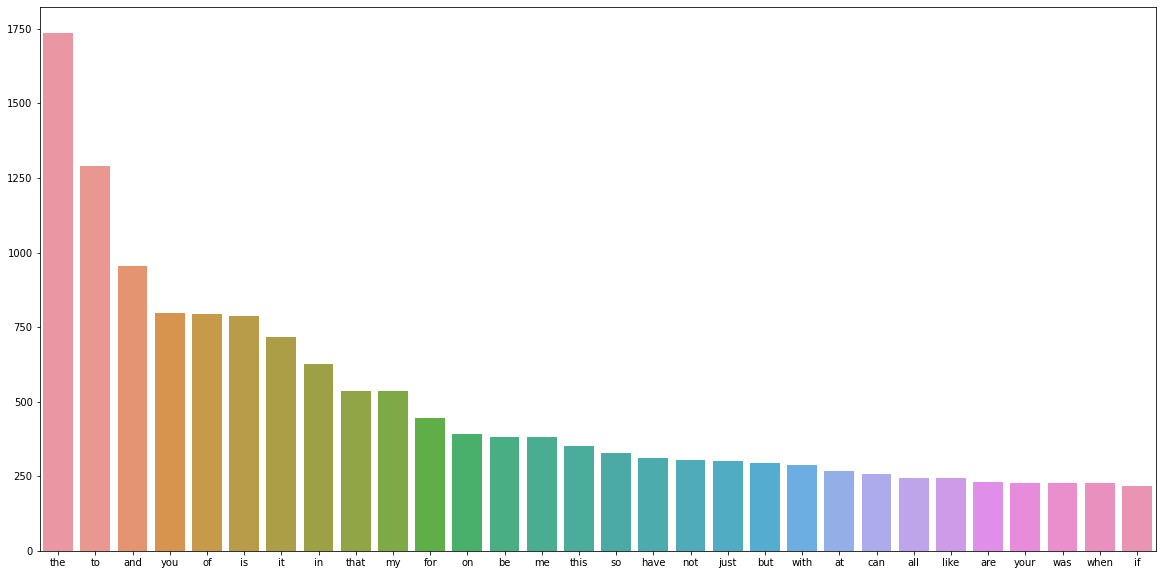

In [8]:
train_sum_freq_df = pd.DataFrame(train_term_frequencies)
train_sum_freq_df = train_sum_freq_df.sort_values(by = 0, axis = 1, ascending = False)
train_sum_freq_df = train_sum_freq_df[train_sum_freq_df.columns[:30]].copy()
plt.subplots(figsize=(20, 10))
ax = sns.barplot(data=train_sum_freq_df)

#### plot test data

In [9]:
test_count_vect = CountVectorizer()
test_count = test_count_vect.fit_transform(test_df.text)

In [10]:
test_term_frequencies = {}
for j in range(0,test_count.shape[1]):
    test_term_frequencies[test_count_vect.get_feature_names()[j]] = sum(test_count[:,j].toarray())

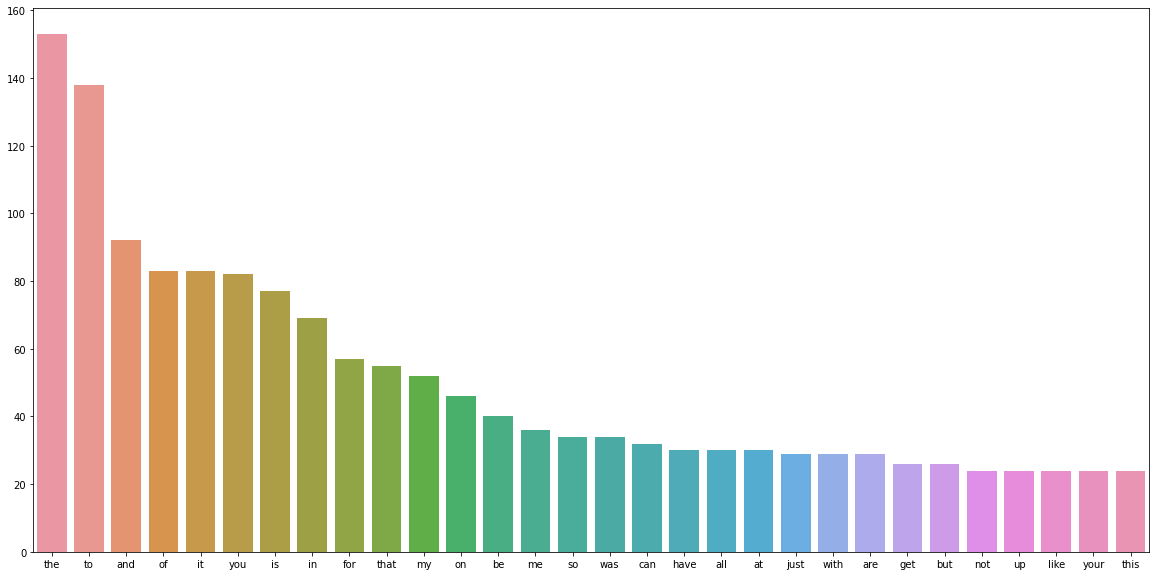

In [11]:
test_sum_freq_df = pd.DataFrame(test_term_frequencies)
test_sum_freq_df = test_sum_freq_df.sort_values(by = 0, axis = 1, ascending = False)
test_sum_freq_df = test_sum_freq_df[test_sum_freq_df.columns[:30]].copy()
plt.subplots(figsize=(20, 10))
ax = sns.barplot(data=test_sum_freq_df)

### Exercise 2

Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110]

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

In [14]:
train_data = tfidf_vectorizer.fit_transform(train_df['text'])

In [15]:
tfidf_vectorizer.get_feature_names()[100:110]

['bitter',
 'black',
 'blacks',
 'blame',
 'blessed',
 'blood',
 'bloody',
 'blues',
 'body',
 'boiling']

In [16]:
test_data = tfidf_vectorizer.fit_transform(test_df['text'])

In [17]:
tfidf_vectorizer.get_feature_names()[100:110]

['bout',
 'box',
 'boy',
 'brace',
 'braved',
 'bread',
 'breezy',
 'brewing',
 'brian',
 'brilliant']

### Exercise 3 

Can you interpret the results above? What do they mean?

#### Answer
1. When true label is the same as predicted label, it means the model made the correct prediction.
2. According to the figure, the darker of the color the bigger of the number.
3. As the no.1 said, we can know the numbers on the bevel is the correct predictions' count.
    Since they are more darker than others, we can realize that the preditions have not bad accuracy.
4. When we focus on the horizon line on the figure, we can know the features of the text on specific emotion may have some similarity with others' emtions, and make the model to predict to the wrong result.
5. When we focus on the straight line on the figure, we can know the features of the emotion may have some similarity with others, and make the model to predict to the wrong result.

## Tokenize

In [22]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(3613, 500)

## Generate training & testing data

In [23]:
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

### Exercise 4

Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

In [18]:
from sklearn.naive_bayes import MultinomialNB

In [19]:
nb = MultinomialNB()

In [24]:
nb.fit(X_train, y_train)

MultinomialNB()

In [25]:
nb_result = nb.predict(X_test)

In [26]:
nb.score(X_test,y_test)

0.6945244956772334

### Dicision Tree Training

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
dicision_tree_result = DT_model.predict(X_test)

## Function from Lab2

In [30]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

### Exercise 5

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences

In [28]:
from sklearn.metrics import confusion_matrix

### Naive Bays Reault

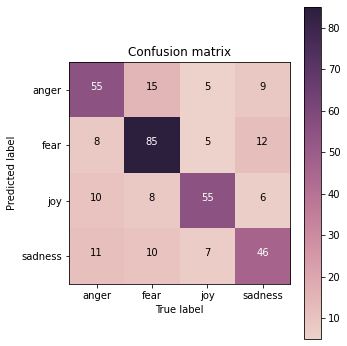

In [31]:
cm = confusion_matrix(y_true=y_test, y_pred=nb_result)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

In [32]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report
# y_ture means ground truth
print(classification_report(y_true=y_test, y_pred=nb_result))

              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.72      0.77      0.75       110
         joy       0.76      0.70      0.73        79
     sadness       0.63      0.62      0.63        74

    accuracy                           0.69       347
   macro avg       0.69      0.69      0.69       347
weighted avg       0.70      0.69      0.69       347



Naive Bays

### Dicision Tree Result

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=nb_result)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

In [ ]:
# y_ture means ground truth
print(classification_report(y_true=y_test, y_pred=dicision_tree_result))

Dicision Tree tends to classiify the data by feature separatly, while Naive Bays would combine the probilities of features.
Because of the characteristic of the Naive Bays, the result is more affected by the dense data, i.e 'fear'.
And Dicision Tree seems to have more average result.

### Exercise 6  
Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

In [33]:
import matplotlib.pyplot as plt

In [35]:
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")

<AxesSubplot:xlabel='epoch'>

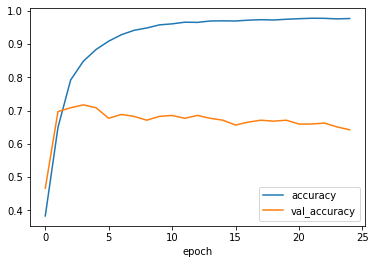

In [36]:
training_log.plot(x='epoch', y=['accuracy','val_accuracy'])

<AxesSubplot:xlabel='epoch'>

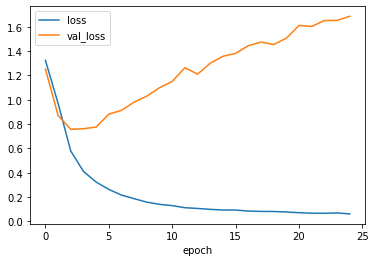

In [37]:
training_log.plot(x='epoch', y=['loss','val_loss'])

When epoch is more than 2, the result starts to have overfitting.  
The loss of test set is getting higher.  
Because of the result above, it seems to have too much noise in the dataset or the classification method does not work really well.

## Word2Vector

In [ ]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))

In [ ]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values

In [ ]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

In [ ]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

In [ ]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

### Exercise 7

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). How can we utilize these "word" vectors to represent the sentence data and train our model?

In [ ]:
# convert each token to embedding
train_vectors = []
for word in train_df['text_tokenized']:
    train_vectors.append(glove_twitter_25_model[word].tolist())

In [ ]:
test_df['text_tokenized'] = test_df['text'].apply(lambda x: nltk.word_tokenize(x))

In [ ]:
# convert each token to embedding
test_vectors = []
for word in test_df['text_tokenized']:
    test_vectors.append(glove_twitter_25_model[word].tolist())

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(vectors, train_df['emotion'])

# Prediction of the first 15 samples of all features
predict = clf.predict(test_vectors)
# Calculating the score of the predictions
score = clf.score(test_vectors, y_test)

### Exercise 8

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [42]:
word_list = ['happy', 'angry', 'sad', 'fear']
topn = 15

happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

target_words = happy_words + angry_words + sad_words + fear_words

cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

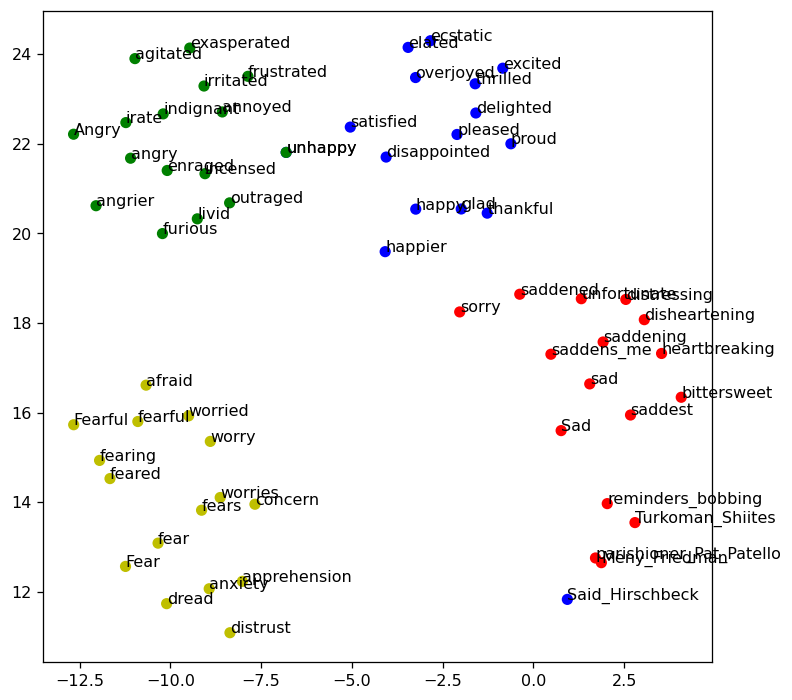

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# 2. Kaggle Competition

![Imgur](img/pic0.png)

# 3. My work developping the model for the competition

## Preprocessing

In [45]:
import pandas as pd
import json

In [47]:
# load identification and emotion csv file and convert to dataframe
identification = pd.read_csv("dm2020-hw2-nthu/data_identification.csv")
emotion = pd.read_csv("dm2020-hw2-nthu/emotion.csv")

In [48]:
# read raw data from json
raw_data_file = open('dm2020-hw2-nthu/tweets_DM.json', 'r', encoding='utf-8')
raw_data = []
for line in raw_data_file.readlines():
    dic = json.loads(line)
    raw_data.append(dic)

In [49]:
# get only tweet data from raw data
tweets = []
for d in raw_data:
    tweet = d['_source']['tweet']
    tweets.append(tweet)

In [50]:
# combine all data
tweets_df = pd.DataFrame(tweets)
tweets_df = pd.merge(tweets_df, identification, left_on='tweet_id', right_on='tweet_id', how='left')
tweets_df = pd.merge(tweets_df, emotion, left_on='tweet_id', right_on='tweet_id', how='left')

In [51]:
# divide data to train & test datasets
train_tweets_df = tweets_df[tweets_df['identification'] == 'train']
test_tweets_df = tweets_df[tweets_df['identification'] == 'test']

## Features extraction with CountVectorizer

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

In [52]:
# I have tried from 500 to 100000 to check the result
features_num = 500

In [54]:
bow = CountVectorizer(max_features=features_num, tokenizer=nltk.word_tokenize)
bow.fit(train_tweets_df['text'])

CountVectorizer(max_features=500,
                tokenizer=<function word_tokenize at 0x1294426a8>)

In [55]:
train_data_BOW_features = bow.transform(train_tweets_df['text'])

In [56]:
X_train = train_data_BOW_features
y_train = train_tweets_df['emotion']

In [57]:
X_test = bow.transform(test_tweets_df['text'])

## Build classification model and predict

I tried three model: Dicision Tree, Naive Bayes and Logistic Regression.
Found that Logistic Regression model get best result and efficiency in three models.

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

### Dicision Tree

In [60]:
# build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)
# training
DT_model = DT_model.fit(X_train, y_train)
# predict
result = DT_model.predict(X_test)

KeyboardInterrupt: 

### Naive Bayes

In [65]:
# build NaiveBayesClass model
classifier = MultinomialNB()
classifier.fit(X_train, y_train) 
# classifier = nltk.NaiveBayesClassifier.train(X_train, y_train)
result = classifier.predict(X_test)

### Logistic Regression

In [66]:
# build LogisticRegression model
classifier = LogisticRegression()
# train
classifier.fit(X_train, y_train)
# predict
result = classifier.predict(X_test)

## Output the result

In [59]:
import csv

In [ ]:
with open('submit.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['id', 'emotion'])
    count = 0
    for index, row in test_tweets_df.iterrows():
        writer.writerow([row['tweet_id'], result[count]])
        count += 1

## Features extraction by myself

### try to divide training data by different emotions

In [ ]:
# anger, anticipation, disgust, fear, sadness, surprise, trust, and joy
joy_train_df = train_tweets_df[train_tweets_df['emotion'] == 'joy']
anger_train_df = train_tweets_df[train_tweets_df['emotion'] == 'anger']
anticipation_train_df = train_tweets_df[train_tweets_df['emotion'] == 'anticipation']
disgust_train_df = train_tweets_df[train_tweets_df['emotion'] == 'disgust']
fear_train_df = train_tweets_df[train_tweets_df['emotion'] == 'fear']
sadness_train_df = train_tweets_df[train_tweets_df['emotion'] == 'sadness']
surprise_train_df = train_tweets_df[train_tweets_df['emotion'] == 'surprise']
trust_train_df = train_tweets_df[train_tweets_df['emotion'] == 'trust']

### train the freatures separatly

In [ ]:
joy_train_data_BOW_features = bow.transform(joy_train_df['text'])
anger_train_data_BOW_features = bow.transform(anger_train_df['text'])
anticipation_train_data_BOW_features = bow.transform(anticipation_train_df['text'])
disgust_train_data_BOW_features = bow.transform(disgust_train_df['text'])
fear_train_data_BOW_features = bow.transform(fear_train_df['text'])
sadness_train_data_BOW_features = bow.transform(sadness_train_df['text'])
surprise_train_data_BOW_features = bow.transform(surprise_train_df['text'])
trust_train_data_BOW_features = bow.transform(trust_train_df['text'])

### get features frequency separatly

In [123]:
joy_features = {}
for j in range(0,500):
    joy_features[bow_500.get_feature_names()[j]] = sum(joy_train_data_BOW_features_500[:,j].toarray())

In [161]:
joy_train_sum_freq_df = pd.DataFrame(joy_features)
joy_train_sum_freq_df = joy_train_sum_freq_df.sort_values(by = 0, axis = 1, ascending = False)
joy_train_sum_freq_df = joy_train_sum_freq_df[joy_train_sum_freq_df.columns[0:150]].copy()
joy_data_features = joy_train_sum_freq_df.head()

In [126]:
anger_features = {}
for j in range(0,500):
    anger_features[bow_500.get_feature_names()[j]] = sum(anger_train_data_BOW_features_500[:,j].toarray())

In [162]:
anger_train_sum_freq_df = pd.DataFrame(anger_features)
anger_train_sum_freq_df = anger_train_sum_freq_df.sort_values(by = 0, axis = 1, ascending = False)
anger_train_sum_freq_df = anger_train_sum_freq_df[anger_train_sum_freq_df.columns[0:150]].copy()
anger_data_features = anger_train_sum_freq_df.head()

In [128]:
anticipation_features = {}
for j in range(0,500):
    anticipation_features[bow_500.get_feature_names()[j]] = sum(anticipation_train_data_BOW_features_500[:,j].toarray())

In [163]:
anticipation_train_sum_freq_df = pd.DataFrame(anticipation_features)
anticipation_train_sum_freq_df = anticipation_train_sum_freq_df.sort_values(by = 0, axis = 1, ascending = False)
anticipation_train_sum_freq_df = anticipation_train_sum_freq_df[anticipation_train_sum_freq_df.columns[0:150]].copy()
anticipation_data_features = anticipation_train_sum_freq_df.head()

In [130]:
disgust_features = {}
for j in range(0,500):
    disgust_features[bow_500.get_feature_names()[j]] = sum(disgust_train_data_BOW_features_500[:,j].toarray())

In [164]:
disgust_train_sum_freq_df = pd.DataFrame(disgust_features)
disgust_train_sum_freq_df = disgust_train_sum_freq_df.sort_values(by = 0, axis = 1, ascending = False)
disgust_train_sum_freq_df = disgust_train_sum_freq_df[disgust_train_sum_freq_df.columns[0:150]].copy()
disgust_data_features = disgust_train_sum_freq_df.head()

In [132]:
fear_features = {}
for j in range(0,500):
    fear_features[bow_500.get_feature_names()[j]] = sum(fear_train_data_BOW_features_500[:,j].toarray())

In [165]:
fear_train_sum_freq_df = pd.DataFrame(fear_features)
fear_train_sum_freq_df = fear_train_sum_freq_df.sort_values(by = 0, axis = 1, ascending = False)
fear_train_sum_freq_df = fear_train_sum_freq_df[fear_train_sum_freq_df.columns[0:150]].copy()
fear_data_features = fear_train_sum_freq_df.head()

In [134]:
sadness_features = {}
for j in range(0,500):
    sadness_features[bow_500.get_feature_names()[j]] = sum(sadness_train_data_BOW_features_500[:,j].toarray())

In [166]:
sadness_train_sum_freq_df = pd.DataFrame(sadness_features)
sadness_train_sum_freq_df = sadness_train_sum_freq_df.sort_values(by = 0, axis = 1, ascending = False)
sadness_train_sum_freq_df = sadness_train_sum_freq_df[sadness_train_sum_freq_df.columns[0:150]].copy()
sadness_data_features = sadness_train_sum_freq_df.head()

In [136]:
surprise_features = {}
for j in range(0,500):
    surprise_features[bow_500.get_feature_names()[j]] = sum(surprise_train_data_BOW_features_500[:,j].toarray())

In [167]:
surprise_train_sum_freq_df = pd.DataFrame(surprise_features)
surprise_train_sum_freq_df = surprise_train_sum_freq_df.sort_values(by = 0, axis = 1, ascending = False)
surprise_train_sum_freq_df = surprise_train_sum_freq_df[surprise_train_sum_freq_df.columns[0:150]].copy()
surprise_data_features = surprise_train_sum_freq_df.head()

In [138]:
trust_features = {}
for j in range(0,500):
    trust_features[bow_500.get_feature_names()[j]] = sum(trust_train_data_BOW_features_500[:,j].toarray())

In [168]:
trust_train_sum_freq_df = pd.DataFrame(trust_features)
trust_train_sum_freq_df = trust_train_sum_freq_df.sort_values(by = 0, axis = 1, ascending = False)
trust_train_sum_freq_df = trust_train_sum_freq_df[trust_train_sum_freq_df.columns[0:150]].copy()
trust_data_features = trust_train_sum_freq_df.head()

In [ ]:
joy_feature_list = joy_data_features.columns.tolist()
anger_feature_list = anger_data_features.columns.tolist()
anticipation_feature_list = anticipation_data_features.columns.tolist()
disgust_feature_list = disgust_data_features.columns.tolist()
fear_feature_list = fear_data_features.columns.tolist()
sadness_feature_list = sadness_data_features.columns.tolist()
surprise_feature_list = surprise_data_features.columns.tolist()
trust_feature_list = trust_data_features.columns.tolist()

### features extraction function

In [ ]:
def get_features(text, hashtag):
    # features
    split_text = text.split()
    
    joy = len([x for x in split_text if x in joy_feature_list])
    anger = len([x for x in split_text if x in anger_feature_list])
    anticipation = len([x for x in split_text if x in anticipation_feature_list])
    disgust = len([x for x in split_text if x in disgust_feature_list])
    fear = len([x for x in split_text if x in fear_feature_list])
    sadness = len([x for x in split_text if x in sadness_feature_list])
    surprise = len([x for x in split_text if x in surprise_feature_list])
    trust = len([x for x in split_text if x in trust_feature_list])
    
    return {
        'joy': joy, 
        'anger': anger,
        'anticipation': anticipation,
        'disgust': disgust,
        'fear': fear,
        'sadness': sadness,
        'surprise': surprise,
        'trust': trust,
        'hashtag': ','.join(hashtag), #hashtag
        'hashtag_count': len(hashtag),
        'length': len(split_text),
    }

In [ ]:
def get_feature_data(df):
    feature_data_list = []
    for index, row in df.iterrows():
        feature_data = get_features(row['text'],row['hashtags'])
        feature_data_list.append(tuple([feature_data, row['emotion']]))
    return feature_data_list

In [ ]:
feature_data_list = get_feature_data(train_tweets_df)

### train the model

In [ ]:
from nltk import NaiveBayesClassifier

In [ ]:
classifier = NaiveBayesClassifier.train(feature_data_list)

### predict the result

In [ ]:
pred = []
count = 0
for index, row in test_tweets_df.iterrows():
    text_features = X_test[count].tocoo().data.tolist()
    text_features = ''.join(str(x) for x in text_features)
    hashtags = row['hashtags']
    result = classifier.classify({'text': text_features,
                         'hashtag': ' '.join(hashtags)})
    pred.append(result)
    count += 1

## Deep learning

I also tried to use deep learning methods to train the model,but there are some error I did not solve.  
My reference: https://keras.io/examples/nlp/pretrained_word_embeddings/

### Tokenized

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=200)
text_ds = tf.data.Dataset.from_tensor_slices(train_tweets_df['text']).batch(128)
vectorizer.adapt(text_ds)

In [ ]:
voc = vectorizer.get_vocabulary()
voc = [x.decode('utf-8') for x in voc]
word_index = dict(zip(voc, range(len(voc))))

### Use pre-trained model

In [ ]:
path_to_glove_file = './glove/glove.twitter.27B/glove.twitter.27B.100d.txt'

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

In [ ]:
num_tokens = len(voc) + 2
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1

In [ ]:
print("Converted %d words (%d misses)" % (hits, misses))

### Deal with Embedding

In [ ]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

### convert emotion to vector

I tried to convert to one hot vector and define by myself, but both of them did not work for training.

In [57]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [58]:
mlb = preprocessing.LabelBinarizer()

In [59]:
mlb.fit(train_tweets_df['emotion'])

LabelBinarizer()

In [60]:
train_tweets_df['bin_emotion'] = mlb.transform(train_tweets_df['emotion']).tolist()

In [111]:
# anger, anticipation, disgust, fear, sadness, surprise, trust, and joy
def emotion_to_vec(row):
    emotion = row['emotion']
    if emotion == 'anger':
        return 0.1
    if emotion == 'anticipation':
        return 0.2
    if emotion == 'disgust':
        return 0.3
    if emotion == 'fear':
        return 0.4
    if emotion == 'sadness':
        return 0.5
    if emotion == 'surprise':
        return 0.6
    if emotion == 'trust':
        return 0.7
    if emotion == 'joy':
        return 0.8
    else:
        return -1

In [112]:
train_tweets_df['vec_emotion'] = train_tweets_df.apply (lambda row: emotion_to_vec(row), axis=1)

### Setting the model

In [ ]:
from tensorflow.keras import layers

int_sequences_input = keras.Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(128, 5, activation="relu")(embedded_sequences)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)

In [ ]:
preds = layers.Dense(256, activation="softmax")(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

### generate the training data

In [93]:
x_train = vectorizer(np.array([[s] for s in train_tweets_df['text']])).numpy()


In [124]:
y_train = np.array([s for s in train_tweets_df['bin_emotion']])

In [128]:
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)
model.fit(x_train, y_train, epochs=20)

Epoch 1/20


InvalidArgumentError:  logits and labels must have the same first dimension, got logits shape [32,256] and labels shape [256]
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-128-90635685c4ee>:4) ]] [Op:__inference_train_function_1293836]

Function call stack:
train_function


I got error: ''logits and labels must have the same first dimension'' here